In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# from plotly import graph_objects as go

import matplotlib

# import plotly
import sklearn

print("package版本信息：")
print("numpy:      ", np.__version__)
print("pandas:     ", pd.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)
print("seaborn:    ", sns.__version__)
# print("plotly:     ", plotly.__version__)

package版本信息：
numpy:       1.23.3
pandas:      1.4.4
matplotlib:  3.5.3
sklearn:     1.1.2
seaborn:     0.12.1


In [2]:
# 设置显示所有的列
pd.options.display.max_columns = None
# 设置显示所有的行
pd.options.display.max_rows = None

# 阻止waring显示
import warnings
warnings.filterwarnings('ignore')

# jupyter notebook设置同一个cell打印多个结果
from IPython.display import display
# 然后使用
# display("a")
# display("b")

In [3]:
%cd ..

/Users/daniel/Documents/Python-Projects/Data-Analysis


In [4]:
%pwd

'/Users/daniel/Documents/Python-Projects/Data-Analysis'

本文档内容分为两部分：
1. 整理Sklearn里提供的数据集工具
2. 讨论使用sklearn构建机器学习的流水线，实现一步到位的处理过程。

参考文档：
+ [sklearn User Guide -> 7. Dataset loading utilities](https://scikit-learn.org/1.4/datasets.html)
+ [sklearn User Guide -> 6.1. Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html#pipelines-and-composite-estimators)


# Sklearn数据集工具

sklearn里提供了3种类型的数据集工具
1. **The dataset loaders**: 提供了一些 toy dataset，无需下载，sklearn自带
2. **The dataset fetchers**: 提供了一些 online dataset，需要联网下载，机器学习中常被用作benchmark的真实数据集
3. **The dataset generation functions**: 提供了特定分布的数据集生成工具

loaders 和 fetchers 工具函数返回的都是 `Bunch` 对象，它继承了`dict`，并扩展了一些功能（主要是支持通过`.attr`的方式访问属性），它通常有如下key:
+ `data`: 存放数据的array, shape=`n_samples`*`n_features`
+ `target`: 包含目标值的array
+ `DESC`: 数据集描述，可选
+ `feature_names` 和 `target_names`: 特征名称和目标名称，可选

generation functions 工具通常返回的是一个元组 `(X, y)`。


## Dataset loaders
包括如下数据集：

| 任务类型 | 函数                                                         | 描述                                                         |
| -------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| 分类     | [`load_iris`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)(*[, return_X_y, as_frame]) | Load and return the iris dataset (classification).           |
| 回归     | [`load_diabetes`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)(*[, return_X_y, as_frame, scaled]) | Load and return the diabetes dataset (regression).           |
| 分类     | [`load_digits`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)(*[, n_class, return_X_y, as_frame]) | Load and return the digits dataset (classification).         |
| 分类     | [`load_wine`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)(*[, return_X_y, as_frame]) | Load and return the wine dataset (classification).           |
| 分类     | [`load_breast_cancer`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)(*[, return_X_y, as_frame]) | Load and return the breast cancer wisconsin dataset (classification). |
|          | [`load_linnerud`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud)(*[, return_X_y, as_frame]) | Load and return the physical exercise Linnerud dataset.      |

通用的一些参数含义如下：
+ `return_X_y`: bool，默认`False`，是否返回`(data, target)`的二元组，而非`Bunch`对象
+ `as_frame`: bool，默认`False`，返回的`Bunch`对象里，`frame`是否以dataframe的形式保存数据


### 分类数据示例

In [22]:
from sklearn.datasets import load_iris

In [2]:
iris_data_v1 = load_iris()

In [5]:
print(iris_data_v1.__class__)

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
print(iris_data_v1.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [15]:
iris_data_v1.filename

'iris.csv'

In [16]:
iris_data_v1.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
iris_data_v1.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
iris_data_v1.data.shape

(150, 4)

In [19]:
iris_data_v1.target.shape

(150,)

In [21]:
print(iris_data_v1.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [38]:
# 此时 frame 里没有数据
print(iris_data_v1.frame)

None


In [36]:
iris_data_v2 = load_iris(as_frame=True)

In [37]:
print(iris_data_v2.__class__)

<class 'sklearn.utils._bunch.Bunch'>


In [39]:
iris_data_v2.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [59]:
# 现在有数据了，而且是 DataFrame 对象
iris_data_v2.frame.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
iris_data_v3 = load_iris(return_X_y=True)

In [42]:
print(iris_data_v3.__class__)

<class 'tuple'>


In [43]:
iris_data_v3[0].shape

(150, 4)

In [44]:
iris_data_v3[1].shape

(150,)

### 回归数据示例

In [23]:
from sklearn.datasets import load_iris, load_diabetes

In [45]:
diabetes_data = load_diabetes()

In [46]:
diabetes_data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [47]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [49]:
diabetes_data.data.shape

(442, 10)

In [50]:
diabetes_data.target.shape

(442,)

In [54]:
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [56]:
print(diabetes_data.frame)

None


In [57]:
diabetes_data_v2 = load_diabetes(as_frame=True)

In [58]:
diabetes_data_v2.frame.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Dataset fetchers
包含如下数据集：


| 任务类型 | 函数                                                         | 说明                                                         |
| -------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| 分类     | [`fetch_olivetti_faces`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces)(*[, data_home, ...]) | Load the Olivetti faces data-set from AT&T (classification). |
| 分类     | [`fetch_20newsgroups`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups)(*[, data_home, subset, ...]) | Load the filenames and data from the 20 newsgroups dataset (classification). |
| 分类     | [`fetch_20newsgroups_vectorized`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.fetch_20newsgroups_vectorized.html#sklearn.datasets.fetch_20newsgroups_vectorized)(*[, subset, ...]) | Load and vectorize the 20 newsgroups dataset (classification). |
| 分类     | [`fetch_lfw_people`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people)(*[, data_home, funneled, ...]) | Load the Labeled Faces in the Wild (LFW) people dataset (classification). |
| 分类     | [`fetch_lfw_pairs`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.fetch_lfw_pairs.html#sklearn.datasets.fetch_lfw_pairs)(*[, subset, data_home, ...]) | Load the Labeled Faces in the Wild (LFW) pairs dataset (classification). |
| 分类     | [`fetch_covtype`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype)(*[, data_home, ...]) | Load the covertype dataset (classification).                 |
| 分类     | [`fetch_rcv1`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.fetch_rcv1.html#sklearn.datasets.fetch_rcv1)(*[, data_home, subset, ...]) | Load the RCV1 multilabel dataset (classification).           |
| 分类     | [`fetch_kddcup99`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.fetch_kddcup99.html#sklearn.datasets.fetch_kddcup99)(*[, subset, data_home, ...]) | Load the kddcup99 dataset (classification).                  |
| 回归     | [`fetch_california_housing`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)(*[, data_home, ...]) | Load the California housing dataset (regression).            |
|          | [`fetch_species_distributions`](https://scikit-learn.org/1.4/modules/generated/sklearn.datasets.fetch_species_distributions.html#sklearn.datasets.fetch_species_distributions)(*[, data_home, ...]) | Loader for species distribution dataset from Phillips et.    |

### 分类数据示例

感觉这些分类数据都不太合适。。。

### 回归数据示例

只提供了一个回归数据集。

In [60]:
from sklearn.datasets import fetch_california_housing

In [67]:
house_data = fetch_california_housing(as_frame=True)

In [68]:
print(house_data.__class__)

<class 'sklearn.utils._bunch.Bunch'>


In [69]:
print(house_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [70]:
print(house_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [71]:
print(house_data.target_names)

['MedHouseVal']


In [73]:
print(house_data.data.shape)

(20640, 8)


In [72]:
print(house_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [74]:
house_data.frame.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Dataset generation

分成如下几类：


<font color="blue">**单标签数据生成**</font>

这个比较常用

```python
# 生成 两类 2-D 月牙形分布数据
make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)

# 生成 两类 2-D 圆形分布数据
make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)

# 简单聚类的高斯分布
make_blobs(
    n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False
)

# 复杂高斯分布，通过引入相关的，冗余的和未知的噪音特征来混淆高斯分布
make_classification(
    n_samples=100, 
    n_features=20, # 特征总数，包括 n_informative 信息特征、n_redundant冗余特征、n_repeated重复特征和 n_features-n_informative-n_redundant-n_repeated随机抽取的无用特征
    *, 
    n_informative=2, n_redundant=2, n_repeated=0, 
    n_classes=2,              # 分类问题的类（或标签）数
    n_clusters_per_class=2,   # 每个类的集群数
    weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None
)
```


In [75]:
from sklearn.datasets import make_moons, make_circles, make_blobs, make_classification

In [98]:
# 可以通过 noise 来调整分布的方差
moons_X, moons_y = make_moons(noise=0.05)
circles_X, circles_y = make_circles(noise=0.03)

In [113]:
print('moons data shape: ', moons_X.shape, '; ' , moons_y.shape)
print('circles data shape: ', circles_X.shape, '; ' , circles_y.shape)

moons data shape:  (100, 2) ;  (100,)
circles data shape:  (100, 2) ;  (100,)


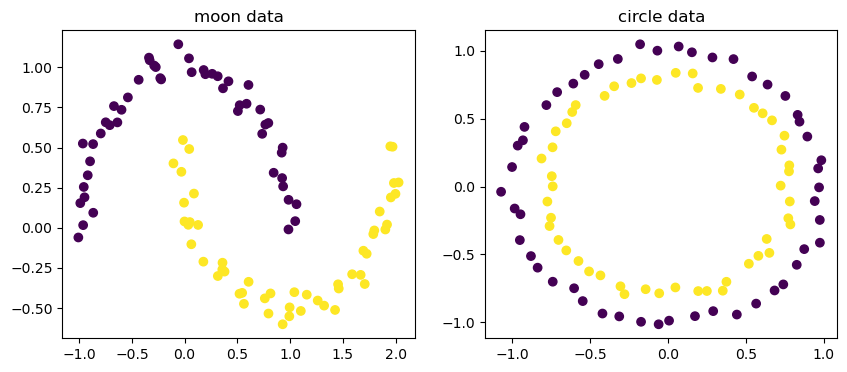

In [103]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("moon data")
ax2.set_title("circle data")
ax1.scatter(moons_X[:, 0], moons_X[:,1], c=moons_y)
ax2.scatter(circles_X[:, 0], circles_X[:,1], c=circles_y)

In [131]:
blobs_X, blobs_y = make_blobs(n_samples=120, n_features=2, centers=3, cluster_std=0.8)

In [141]:
cls_X, cls_y = make_classification(n_samples=120, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, class_sep=1.5)

In [142]:
print('blobs data shape: ', blobs_X.shape, '; ' , blobs_y.shape)
print('cls data shape: ', cls_X.shape, '; ' , cls_y.shape)

blobs data shape:  (120, 2) ;  (120,)
cls data shape:  (120, 2) ;  (120,)


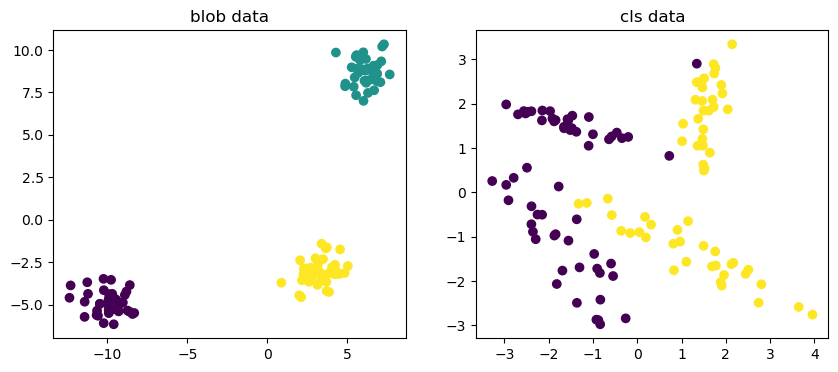

In [143]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("blob data")
ax2.set_title("cls data")
ax1.scatter(blobs_X[:, 0], blobs_X[:,1], c=blobs_y)
ax2.scatter(cls_X[:, 0], cls_X[:,1], c=cls_y)

<font color="blue">**多标签数据生成**</font>

```python
make_multilabel_classification(
    n_samples=100, n_features=20, *, n_classes=5, n_labels=2, 
    length=50, allow_unlabeled=True, sparse=False, return_indicator='dense', return_distributions=False, random_state=None
)
```

In [145]:
from sklearn.datasets import make_multilabel_classification

In [152]:
multi_X, multi_y = make_multilabel_classification(n_samples=120, n_features=20, n_classes=3, n_labels=4, random_state=42)

In [153]:
print(multi_X.shape)
print(multi_y.shape)

(120, 20)
(120, 3)


In [154]:
multi_X[:5]

array([[3., 3., 4., 2., 2., 1., 1., 6., 0., 3., 5., 2., 0., 4., 0., 4.,
        8., 5., 1., 0.],
       [1., 4., 3., 0., 2., 5., 3., 2., 3., 0., 3., 2., 0., 5., 3., 2.,
        2., 1., 2., 3.],
       [2., 0., 3., 2., 2., 3., 2., 2., 4., 1., 3., 3., 1., 4., 3., 4.,
        4., 3., 3., 5.],
       [3., 4., 2., 2., 1., 2., 2., 1., 2., 2., 9., 0., 1., 3., 4., 2.,
        4., 0., 2., 1.],
       [1., 9., 0., 0., 2., 1., 0., 4., 4., 1., 2., 0., 1., 6., 1., 1.,
        8., 8., 0., 1.]])

In [155]:
multi_y[:5]

array([[1, 1, 1],
       [0, 1, 1],
       [1, 1, 1],
       [1, 1, 0],
       [0, 1, 0]])

<font color="blue">**聚类数据生成**</font>

<font color="blue">**回归数据生成**</font>

<font color="blue">**流行学习数据生成**</font>

# 流水线

sklearn中流水线功能主要由 `sklearn.pipeline` 这个模块提供，主要是如下的`Pipeline`类

`Pipeline(steps, *, memory=None, verbose=False)`类
+ 主要参数
  + `steps`：list of (name, transformer) tuples，其中每个transformer都必须实现`fit`/`transform`方法，最后一个必须是estimator

此外，还有一个`make_pipeline()`函数，用于快速创建一个`Pipeline`对象。

In [8]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [7]:
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

In [10]:
# 或者使用 make_pipeline，会自动生成每个步骤的名字
pipe2 = make_pipeline(PCA(), SVC())
pipe2

Pipeline(steps=[('pca', PCA()), ('svc', SVC())])

# 多类型数据转换

通常数据的特征会有多种类型，比如同时含有类别型和数值型特征，此时在pipeline中添加数据预处理步骤时，需要对不同的特征使用不同的变换器，比如对于类别型使用one-hot编码，对于计数型特征使用分箱KBinarize。  

此时就需要`sklearn.compose`模块中的`ColumnTransformer`类的协助：   

`ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True)`
+ `transformers`：   
  List of (name, transformer, columns) tuples，用于指定各个列的转换器
  + name：str，转换器的名称
  + transformer：estimator对象 或者 {‘drop’, ‘passthrough’}，estimator时使用对应的转换器，'drop'表示该列特征被丢弃，'passthrough'表示该列不做任何处理
  + columns：指定该转换器对应的列，str, array-like of str 时指定列名称，int, array-like of int时指定列的索引
+ `remainder`：指定剩余列如何处理
  + 'drop'，丢弃剩余列，这是**默认值**
  + 'passthrough'，不做任何处理
  + estimator，使用指定的估计器处理剩余列
  

> 注意，经过转换后的特征顺序，由传入的`transformers`里出现的顺序确定，其中没有指定的列，在`remainder='passthrough'`下，会被添加到最后。
  
此外，还有一个`make_column_transformer()`函数，用于快速创建。

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [7]:
df = pd.DataFrame({
    'col1': ['a', 'b', 'a', 'b', 'a'],
    'col2': [1, 5, 2, 3, 4],
    'col3': [6, 7, 8, 9, 10]
})
df

,col1,col2,col3
0,a,1,6
1,b,5,7
2,a,2,8
3,b,3,9
4,a,4,10


In [10]:
# 注意，输出的特征顺序由这里传入的顺序决定
transformers=[('min-max', MinMaxScaler(), ['col2']), ('one-hot', OneHotEncoder(), ['col1'])]
ctf = ColumnTransformer(transformers=transformers, remainder='drop')

In [11]:
ctf.fit(df)

ColumnTransformer(transformers=[('min-max', MinMaxScaler(), ['col2']),
                                ('one-hot', OneHotEncoder(), ['col1'])])

In [12]:
ctf.transformers

[('min-max', MinMaxScaler(), ['col2']), ('one-hot', OneHotEncoder(), ['col1'])]

In [13]:
# col1 列使用 one-hot编码，产生2个特征，col2列只是缩放，仍然输出一个特征，col3没有指定转换器，处理方式为drop，所以最后的输出中被丢弃了
# 所以最后输出 3 列
ctf.transform(df)

array([[0.  , 1.  , 0.  ],
       [1.  , 0.  , 1.  ],
       [0.25, 1.  , 0.  ],
       [0.5 , 0.  , 1.  ],
       [0.75, 1.  , 0.  ]])

In [14]:
# col1 列使用 one-hot编码，产生2个特征，col2列只是缩放，仍然输出一个特征，col3没有指定转换器，处理方式为passthrough，所以最后的输出保持不变
# 所以最后输出 4 列
ctf = ColumnTransformer(transformers=transformers, remainder='passthrough')
ctf.fit_transform(df)

array([[ 0.  ,  1.  ,  0.  ,  6.  ],
       [ 1.  ,  0.  ,  1.  ,  7.  ],
       [ 0.25,  1.  ,  0.  ,  8.  ],
       [ 0.5 ,  0.  ,  1.  ,  9.  ],
       [ 0.75,  1.  ,  0.  , 10.  ]])

# 封装自定义转换函数

如果要实现自定义转换，则需要使用`sklearn.preprocess`包中的`FunctionTransformer`类，对自定义处理流程进行包装。

`FunctionTransformer(func=None, inverse_func=None, *, validate=False, accept_sparse=False, check_inverse=True, feature_names_out=None, kw_args=None, inv_kw_args=None)`
+ `func`，自定义的处理流程函数
+ `inverse_func`，逆变换函数，可以为None，此时逆变换为等值变换
+ `kw_args`，dict, default=None，传递给自定义`func`的参数

注意，**这样封装的变换一般是stateless的，比如单纯的对数转换之类的，不需要保存状态**。

# 实现自定义转换器

如果要实现自定义转换器，则需要实现一个继承`BaseEstimator`和`TransformerMixin`（均位于`sklearn.base`包）的类，然后重写其中的`fit()`和`transform()`方法。

下面是一个自定义转换器的例子，它可以同时对类别特征进行one-hot编码以及对计数特征进行分箱。

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer

In [8]:
class FeaturesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, onehot_encoder, onehot_cols, kbins_discretizer, kbin_cols, other_cols):
        # 只要是在形参中出现过的参数，名称必须和形参一样，因为 BaseEstimator 的 get_params() 方法会遍历函数签名中的形参，
        # 如果不一致，会导致 get_params() 方法报错
        self.onehot_encoder = onehot_encoder
        self.onehot_cols = onehot_cols
        self.kbins_discretizer = kbins_discretizer
        self.kbin_cols = kbin_cols
        self.other_cols = other_cols
        
        # 使用 ColumnTransformer 来对不同的列进行不同的特征处理
        transformers = [(self.onehot_encoder, onehot_cols), (self.kbins_discretizer, kbin_cols)]
        self.cols_transformer = make_column_transformer(*transformers, remainder='passthrough')
        self.onehot_cols_res = []

    def make_onehot_cols_res(self):
        # 拼凑出one-hot编码之后的特征名称
        onehot = self.cols_transformer.named_transformers_['onehotencoder']
        onehot_drop_method = onehot.get_params()['drop']
        if onehot_drop_method == 'first':
            for idx, col in enumerate(onehot_cols):
                self.onehot_cols_res.extend([col + '_' + v for v in onehot.categories_[idx].tolist()[1:]])
        else:
            for idx, col in enumerate(onehot_cols):
                self.onehot_cols_res.extend([col + '_' + v for v in onehot.categories_[idx].tolist()])

    def fit(self, X, y=None):
        self.cols_transformer.fit(X)
        self.make_onehot_cols_res()
        
        # 为了支持 fit_transform() 方法里执行的链式调用 fit(X).transform(X)，这里必须要返回 self
        return self

    def transform(self, X):
        X_ = self.cols_transformer.transform(X)
        # return X_
        X_cols = self.onehot_cols_res + self.kbin_cols + self.other_cols
        X = pd.DataFrame(X_, columns=X_cols)
        # 分箱特征的初始值设为从1开始，而不是从0开始
        X[self.kbin_cols] = X[self.kbin_cols] + 1
        return X

In [13]:
df = pd.DataFrame({
    'col1': ['a', 'b', 'a', 'b', 'c'],
    'col2': [1, 5, 2, 3, 4],
    'col3': [6, 7, 8, 9, 10]
})
df

,col1,col2,col3
0,a,1,6
1,b,5,7
2,a,2,8
3,b,3,9
4,c,4,10


In [14]:
onehot_cols = ['col1']
kbin_cols = ['col2']
other_cols = ['col3']

onehot = OneHotEncoder(drop='first', sparse=False, handle_unknown='error')
kbin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

features_transformer = FeaturesTransformer(onehot, onehot_cols, kbin, kbin_cols, other_cols)
features_transformer.fit(df)

FeaturesTransformer(kbin_cols=['col2'],
                    kbins_discretizer=KBinsDiscretizer(encode='ordinal',
                                                       strategy='uniform'),
                    onehot_cols=['col1'],
                    onehot_encoder=OneHotEncoder(drop='first', sparse=False),
                    other_cols=['col3'])

In [15]:
features_transformer.transform(df)

,col1_b,col1_c,col2,col3
0,0.0,0.0,1.0,6.0
1,1.0,0.0,5.0,7.0
2,0.0,0.0,2.0,8.0
3,1.0,0.0,3.0,9.0
4,0.0,1.0,4.0,10.0


# 特征融合

对同一组特征 **并行** 使用 $N$ 个转换器，然后将得到的 $N$ 个输出拼接成新的特征。  

使用`sklearn.pipeline`模块中的`FeatureUnion`类：   
`FeatureUnion(transformer_list, *, n_jobs=None, transformer_weights=None, verbose=False)`
+ `transformer_list`：list of (str, transformer) tuples，指定转换器，之后这些转换器的输出会被拼接起来。

还有一个`make_union()`函数方便使用。

In [28]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD

In [35]:
X = [[0., 1., 3], [2., 2., 5]]

# PCA 保留2个特征， SVD 保留2个特征，最终的输出是 2+2=4 个特征
union = FeatureUnion([("pca", PCA(n_components=2)), ("svd", TruncatedSVD(n_components=2))])
union.fit(X)

FeatureUnion(transformer_list=[('pca', PCA(n_components=2)),
                               ('svd', TruncatedSVD())])

In [36]:
union.transform(X)

array([[ 1.50000000e+00, -1.11022302e-16,  3.03954967e+00,
         8.72432133e-01],
       [-1.50000000e+00,  1.11022302e-16,  5.72586357e+00,
        -4.63126787e-01]])

# 目标特征转换